In [1]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
#from sklearn import neighbors
#from sklearn import linear_model
#from sklearn.naive_bayes import GaussianNB
#from sklearn import svm

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('HR_comma_sep.csv')
# we must convert this into an array ---> transform each variable in a numerical variable
df_train = df
dataset_without_left = df_train.copy()
dataset_without_left.drop(['left'], axis=1, inplace=True)

In [3]:
sales = sorted(df_train['sales'].unique())   
sales_mapping = dict(zip(sales, range(0, len(sales) + 1)))
df_train['sales_val'] = df_train['sales'].map(sales_mapping).astype(int)

salary_mapping = {'low':0, 'medium':1, 'high':2}
df_train['salary_val'] = df_train['salary'].map(salary_mapping).astype(int)

df_train = df_train.drop(['salary', 'sales'], axis=1)

# I want 'left' as first column 
col = list(df_train.columns)
col.remove('left')
col = ['left'] + col

df_train = df_train[col]
df_train.head()
df_train2 = df_train.copy()
df_train2 = df_train2.drop(['number_project', 'time_spend_company','Work_accident','promotion_last_5years','sales_val','salary_val' ], axis=1)
df_train2.head()
df_train.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_val,salary_val
0,1,0.38,0.53,2,157,3,0,0,7,0
1,1,0.80,0.86,5,262,6,0,0,7,1
2,1,0.11,0.88,7,272,4,0,0,7,1
3,1,0.72,0.87,5,223,5,0,0,7,0
4,1,0.37,0.52,2,159,3,0,0,7,0


In [4]:
train_data = df_train.values
train_data

array([[ 1.  ,  0.38,  0.53, ...,  0.  ,  7.  ,  0.  ],
       [ 1.  ,  0.8 ,  0.86, ...,  0.  ,  7.  ,  1.  ],
       [ 1.  ,  0.11,  0.88, ...,  0.  ,  7.  ,  1.  ],
       ..., 
       [ 1.  ,  0.37,  0.53, ...,  0.  ,  8.  ,  0.  ],
       [ 1.  ,  0.11,  0.96, ...,  0.  ,  8.  ,  0.  ],
       [ 1.  ,  0.37,  0.52, ...,  0.  ,  8.  ,  0.  ]])

In [5]:
# Training data features, skip the first column 'left'
train_features = train_data[:, 1:]

# 'left' column values
train_target = train_data[:, 0]

In [6]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=6, 
                                  min_samples_split=2, min_samples_leaf=20)
clf = clf.fit(train_features, train_target)

In [7]:
clf.feature_importances_

array([  5.40892456e-01,   1.44909370e-01,   9.67208241e-02,
         6.14946767e-02,   1.55636252e-01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.46421143e-04])

In [8]:
pred_target = clf.predict(train_features)

print (metrics.precision_score(train_target, pred_target, average='weighted'))
print (metrics.recall_score(train_target, pred_target, average='weighted'))
print (metrics.f1_score(train_target, pred_target, average='weighted'))
print (metrics.accuracy_score(train_target, pred_target))
print (metrics.precision_recall_fscore_support(train_target, pred_target))

0.974461560175
0.974264950997
0.9739068247
0.974264950997
(array([ 0.97188034,  0.98272204]), array([ 0.99501225,  0.90786894]), array([ 0.98331027,  0.94381368]), array([11428,  3571], dtype=int64))


In [9]:
# Train Test Partitioning
# test n.1
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)

In [10]:
# Cross Validation
scores = cross_validation.cross_val_score(clf, 
                                          train_features, train_target, 
                                          cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.00)


In [11]:
train_x.shape, test_x.shape

((11999, 9), (3000, 9))

In [12]:
# overfitting
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=300)
clf = clf.fit(train_x, train_y)

In [13]:
len(train_x), len(test_x), len(train_x) + len(test_x)

(11999, 3000, 14999)

In [14]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [15]:
# Accuracy Evaluation
print (metrics.accuracy_score(train_y, train_pred))
print (metrics.accuracy_score(test_y, test_pred))

0.947495624635
0.953333333333


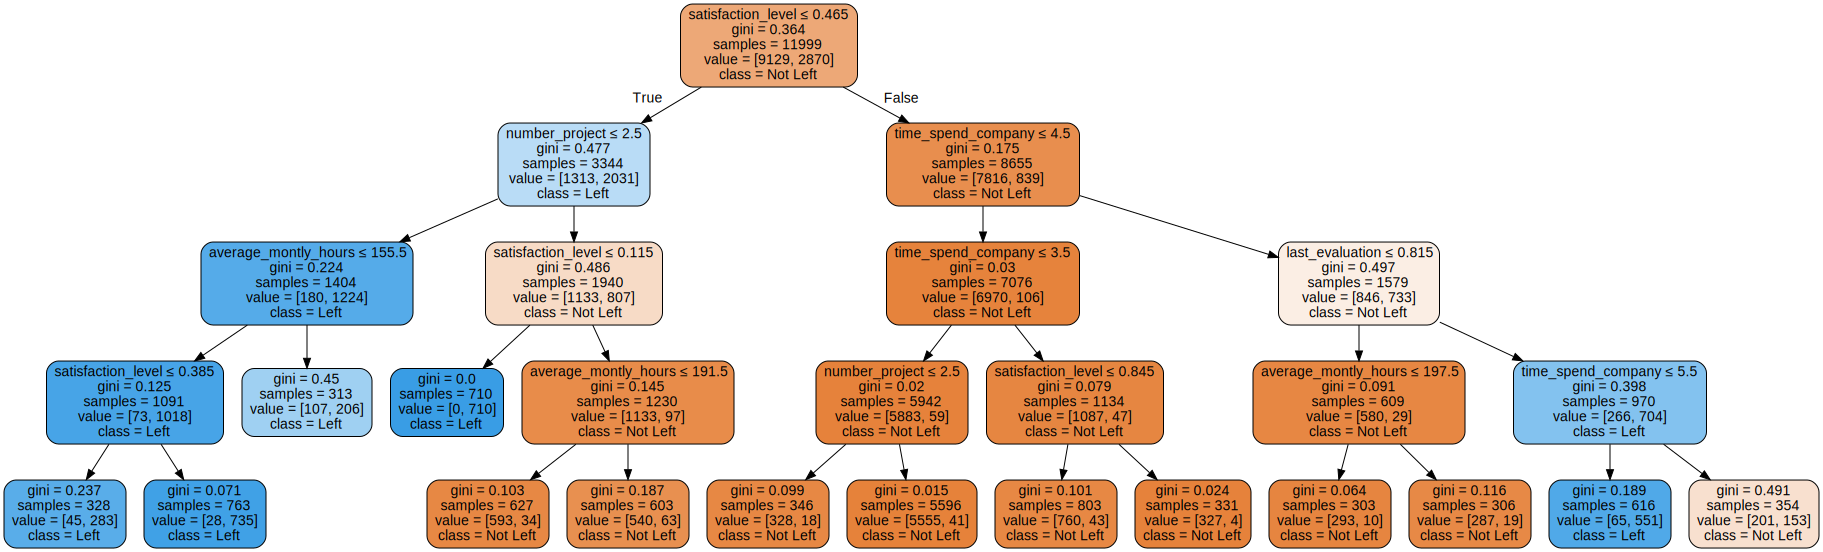

In [16]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=dataset_without_left.columns, class_names=['Not Left', 'Left'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

[[2248   51]
 [  89  612]]


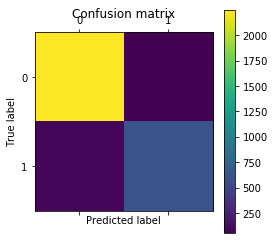

In [17]:
# Confusion Matrix

#   TN     FN  
#   FP     TP

cm = confusion_matrix(test_y, test_pred)
print (cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Not Left', 'Left']))

             precision    recall  f1-score   support

   Not Left       0.96      0.98      0.97      2299
       Left       0.92      0.87      0.90       701

avg / total       0.95      0.95      0.95      3000



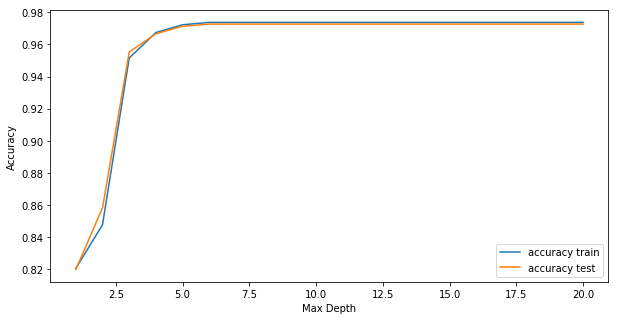

In [19]:
max_depth = 20
acc_train = list()
acc_test = list()
for i in range(max_depth):
    clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=i+1, 
                                  min_samples_split=2, min_samples_leaf=20)
    clf = clf.fit(train_x, train_y)
    train_pred = clf.predict(train_x)
    test_pred = clf.predict(test_x)
    acc_train.append(metrics.accuracy_score(train_y, train_pred))
    acc_test.append(metrics.accuracy_score(test_y, test_pred))

plt.figure(figsize=(10, 5))    
plt.plot(range(1,max_depth+1), acc_train)
plt.plot(range(1,max_depth+1), acc_test)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend(['accuracy train', 'accuracy test'], loc='best')
plt.show()
# best depth??

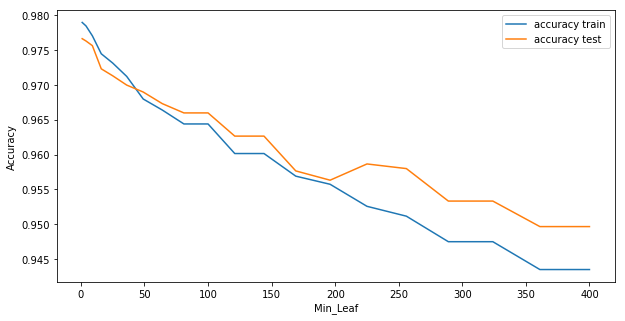

In [20]:
max_depth = 20
acc_train = list()
acc_test = list()
for i in range(max_depth):
    clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth= 6, 
                                  min_samples_split=2, min_samples_leaf=(i+1)*(i+1))
    clf = clf.fit(train_x, train_y)
    train_pred = clf.predict(train_x)
    test_pred = clf.predict(test_x)
    acc_train.append(metrics.accuracy_score(train_y, train_pred))
    acc_test.append(metrics.accuracy_score(test_y, test_pred))
plt.figure(figsize=(10, 5))    
plt.plot([(i+1)*(i+1) for i in range(max_depth)], acc_train)
plt.plot([(i+1)*(i+1) for i in range(max_depth)], acc_test)
plt.xlabel('Min_Leaf')
plt.ylabel('Accuracy')
plt.legend(['accuracy train', 'accuracy test'], loc='best')
plt.show()


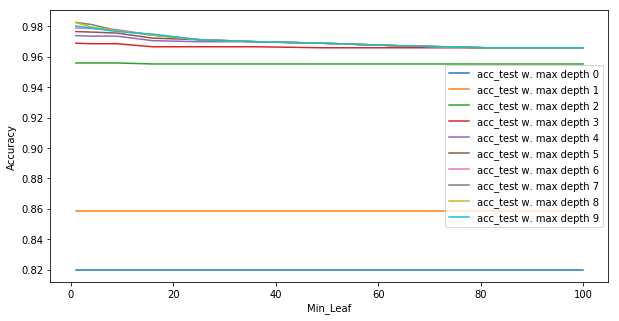

In [21]:
max_depth = 10
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 5))
for j in range(max_depth):
    acc_train = list()
    acc_test = list()
    for i in range(max_depth):
        clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                      max_depth= j+1, 
                                      min_samples_split=2, min_samples_leaf=(i+1)*(i+1))
        clf = clf.fit(train_x, train_y)
        train_pred = clf.predict(train_x)
        test_pred = clf.predict(test_x)
        acc_train.append(metrics.accuracy_score(train_y, train_pred))
        acc_test.append(metrics.accuracy_score(test_y, test_pred))
        
    plt.plot([(i+1)*(i+1) for i in range(max_depth)], acc_test)
plt.xlabel('Min_Leaf')
plt.ylabel('Accuracy')
plt.legend(['acc_test w. max depth '+ str(i) for i in range(max_depth)], loc='best')
plt.show()

In [22]:
# test number 2
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=6,
                                  min_samples_split=2, min_samples_leaf=20,min_impurity_split = 0.15)
clf = clf.fit(train_x, train_y)

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [23]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [24]:
# Accuracy Evaluation
#print (metrics.accuracy_score(train_y, train_pred))
print (metrics.accuracy_score(test_y, test_pred))
print (metrics.precision_score(test_y, test_pred))
print (metrics.recall_score(test_y, test_pred))
print (metrics.f1_score(test_y, test_pred))
# Confusion Matrix

#   TN     FN  
#   FP     TP
cm = confusion_matrix(test_y, test_pred)
print (cm)


0.969333333333
0.952451708767
0.914407988588
0.933042212518
[[2267   32]
 [  60  641]]


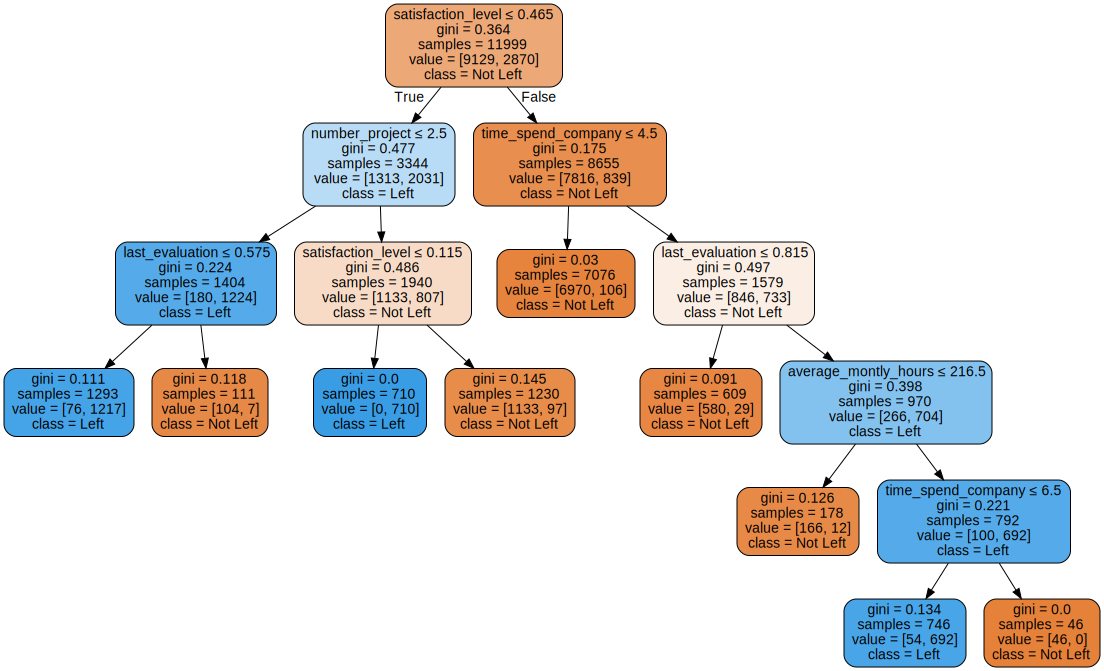

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=dataset_without_left.columns, class_names=['Not Left', 'Left'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [26]:
# Confuzion Matrix

# same confusion matrix of before

In [27]:
# Cross Validation
scores = cross_validation.cross_val_score(clf, 
                                          train_features, train_target, 
                                          cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3

Accuracy: 0.97 (+/- 0.01)


C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\danie\Anaconda3

In [28]:
# Random Forest

clf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=None,
                             max_depth=None, 
                             min_samples_split=2,
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced
clf.fit(train_features, train_target)
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print ('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.01)


In [29]:
predicted = clf.predict(train_features)

In [30]:
cm = confusion_matrix(train_target, predicted)
print (cm)

# a lot of FN..... not very interesting! We are interested in FP

[[11406    22]
 [  188  3383]]


In [31]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=3, 
                                  min_samples_split=2, min_samples_leaf=10)
clf = clf.fit(train_x, train_y)
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)
print (metrics.accuracy_score(train_y, train_pred))
print (metrics.accuracy_score(test_y, test_pred))
cm = confusion_matrix(test_y, test_pred)
print (cm)

0.951579298275
0.955333333333
[[2217   82]
 [  52  649]]


In [32]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=5, 
                                  min_samples_split=10, min_samples_leaf=50)
clf = clf.fit(train_x, train_y)
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)
print (metrics.accuracy_score(train_y, train_pred))
print (metrics.accuracy_score(test_y, test_pred))
cm = confusion_matrix(test_y, test_pred)
print (cm)

0.967997333111
0.969
[[2270   29]
 [  64  637]]


In [33]:
# in these last two cases we have more false positive... maybe it's meaningful